### 15_keras_applications 
Xception VGG16 VGG19 ResNet ResNetV2 ResNeXt InceptionV3 InceptionResNetV2 MobileNet MobileNetV2 DenseNet NASNet  

In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions 
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

# MobileNet
### 內建預訓練模型
Xception VGG16 VGG19 ResNet ResNetV2 ResNeXt InceptionV3 InceptionResNetV2 MobileNet MobileNetV2 DenseNet NASNet

In [15]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
# include_top 是否包含模型頂部的完全連接層
model = MobileNet(weights="imagenet", include_top=True)
img = load_img("koala.png", target_size=(224,224))
x = img_to_array(img)
print("x.shape",x.shape)
# preprocess_input 將圖片 轉成 MobileNet 可處理的input_shape
img = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
img = preprocess_input(img)
print("img.shape: ", img.shape)
# 使用模型進行預測
Y_pred = model.predict(img)
# decode_predictions 解碼預測結果
label = decode_predictions(Y_pred)
result = label[0][0]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

x.shape (224, 224, 3)
img.shape:  (1, 224, 224, 3)
koala (100.00%)


In [16]:
print("label len: ",len(label))
print("label[0] len :",len(label[0]))
result = label[0][4]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

label len:  1
label[0] len : 5
teddy (0.00%)


## ResNet50

In [19]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights="imagenet", include_top=True)
img = load_img("koala.png", target_size=(224, 224))
x = img_to_array(img)
print("x.shape: ", x.shape)
img = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
img = preprocess_input(img)
print("img.shape: ", img.shape)
# 使用模型進行預測
Y_pred = model.predict(img)
# 解碼預測結果
label = decode_predictions(Y_pred)
result = label[0][0]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

102973440/102967424 [==============================] - 60s 1us/step
x.shape:  (224, 224, 3)
img.shape:  (1, 224, 224, 3)
koala (99.93%)


In [20]:
print("label len: ",len(label))
print("label[0] len :",len(label[0]))
result = label[0][4]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

label len:  1
label[0] len : 5
mongoose (0.00%)


## InceptionV3

In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions 

model = InceptionV3(weights="imagenet", include_top=True)
img = load_img("koala.png", target_size=(299,299))
x = img_to_array(img)
print("x.shape: ", x.shape)
img = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
img = preprocess_input(img)
print("img.shape: ", img.shape)
Y_pred = model.predict(img)
label = decode_predictions(Y_pred)
# 解碼預測結果
label = decode_predictions(Y_pred)
result = label[0][0]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

96116736/96112376 [==============================] - 62s 1us/step
x.shape:  (299, 299, 3)
img.shape:  (1, 299, 299, 3)
koala (91.51%)


In [28]:
print("label len: ",len(label[0]))
for i in range(len(label[0])):
    print(label[0][i][1]," ",end="")
print()
result = label[0][1]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

label len:  5
koala  wombat  paintbrush  sarong  American_Staffordshire_terrier  
wombat (0.38%)


## VGG16

In [31]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

model = VGG16(weights="imagenet", include_top=True)
img = load_img("koala.png", target_size=(224,224))
x = img_to_array(img)
print("x.shape: ", x.shape)
img = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
img = preprocess_input(img)
print("img.shape: ", img.shape)
Y_pred = model.predict(img)
# 解碼預測結果
label = decode_predictions(Y_pred)
result = label[0][0]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

553467904/553467096 [==============================] - 375s 1us/step
x.shape:  (224, 224, 3)
img.shape:  (1, 224, 224, 3)
koala (100.00%)


In [32]:
print("label len: ",len(label[0]))
for i in range(len(label[0])):
    print(label[0][i][1]," ",end="")
print()
result = label[0][1]  # 取得最可能的結果
print("%s (%.2f%%)" % (result[1], result[2]*100))

label len:  5
koala  wombat  wallaby  Madagascar_cat  indri  
wombat (0.00%)


## 凍結上層模型 訓練

In [33]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [34]:
seed = 7
np.random.seed(seed)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 建立2個資料集，一個數字小於 5，一個數字大於等於 5
X_train_lt5 = X_train[Y_train < 5]
Y_train_lt5 = Y_train[Y_train < 5]
X_test_lt5 = X_test[Y_test < 5]
Y_test_lt5 = Y_test[Y_test < 5]

X_train_gte5 = X_train[Y_train >= 5]
Y_train_gte5 = Y_train[Y_train >= 5] -5
X_test_gte5 = X_test[Y_test >= 5]
Y_test_gte5 = Y_test[Y_test >= 5] -5

# 將圖片轉換成 4D 張量
X_train_lt5 = X_train_lt5.reshape((X_train_lt5.shape[0], 28, 28, 1)).astype("float32")
X_test_lt5 = X_test_lt5.reshape((X_test_lt5.shape[0], 28, 28, 1)).astype("float32")
X_train_gte5 = X_train_gte5.reshape((X_train_gte5.shape[0], 28, 28, 1)).astype("float32")
X_test_gte5 = X_test_gte5.reshape((X_test_gte5.shape[0], 28, 28, 1)).astype("float32")

# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train_lt5 = X_train_lt5 / 255
X_test_lt5 = X_test_lt5 / 255
X_train_gte5 = X_train_gte5 / 255
X_test_gte5 = X_test_gte5 / 255

# One-hot編碼
Y_train_lt5 = to_categorical(Y_train_lt5, 5)
Y_test_lt5 = to_categorical(Y_test_lt5, 5)
Y_train_gte5 = to_categorical(Y_train_gte5, 5)
Y_test_gte5 = to_categorical(Y_test_gte5, 5)

In [35]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(8, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(5, activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train_lt5, Y_train_lt5, validation_split=0.2, epochs=3, batch_size=128, verbose=2)
loss, accuracy = model.evaluate(X_test_lt5, Y_test_lt5, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_159 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 11, 11, 8)         584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                12864     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [36]:
# 顯示各神經層
print("model.layers",len(model.layers))
for i in range(len(model.layers)):
    print(i, model.layers[i])
# 凍結上層模型
# 卷積層凍結不訓練， Flatten之後的Dense 訓練
for i in range(4):
    model.layers[i].trainable=False
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])    
# 訓練模型
history = model.fit(X_train_gte5, Y_train_gte5, validation_split=0.2,
                    epochs=3, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test_gte5, Y_test_gte5, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

model.layers 8
0 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001FA9D484BA8>
1 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001FA9D471978>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001FA9D463DA0>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001FA8CF72EF0>
4 <tensorflow.python.keras.layers.core.Flatten object at 0x000001FA8C8CBEF0>
5 <tensorflow.python.keras.layers.core.Dense object at 0x000001FA93CC8DA0>
6 <tensorflow.python.keras.layers.core.Dropout object at 0x000001FA8C874EB8>
7 <tensorflow.python.keras.layers.core.Dense object at 0x000001FA8C785B38>
Train on 23523 samples, validate on 5881 samples
Epoch 1/3
23523/23523 - 2s - loss: 0.7369 - accuracy: 0.7558 - val_loss: 0.2502 - val_accuracy: 0.9267
Epoch 2/3
23523/23523 - 1s - loss: 0.2766 - accuracy: 0.9121 - val_loss: 0.1604 - val_accuracy: 0.9519
Epoch 3/3
23523/23523 - 1s - loss: 0.2013 - accuracy: 0.9366 - val_loss: 0.1232 - val_

## 將資料 亂理
### 放大處理

In [38]:
from PIL import Image
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

將訓練資料的圖片尺寸放大...


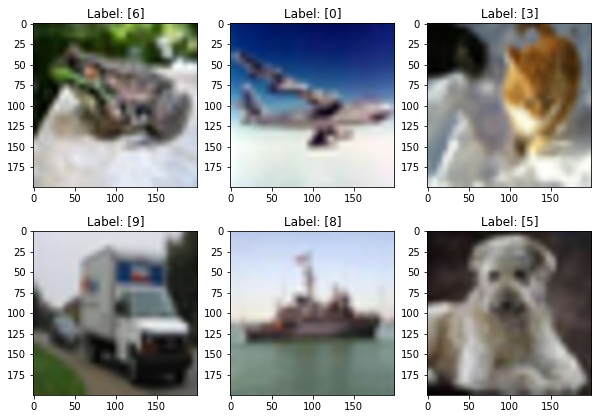

In [42]:
seed = 10
np.random.seed(10)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
# 取出部分的訓練資料
X_train = X_train[:500]
Y_train = Y_train[:500]
# 將訓練資料的圖片尺寸放大 原本 28 * 28
print("將訓練資料的圖片尺寸放大...")
X_train_new = np.array([np.asarray( Image.fromarray(X_train[i]).resize((200,200)) )
                        for i in range(0, len(X_train))])

# 繪出6張圖片
fig = plt.figure(figsize=(10,7))
sub_plot= 230
for i in range(0, 6):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train_new[i], cmap="binary")
    ax.set_title("Label: " + str(Y_train[i]))

plt.show()

In [44]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D

調整X_train的圖片尺寸...
使用 ResNet50 模型預測訓練資料的特徵資料...
調整X_test的圖片尺寸...
使用 ResNet50 模型預測測試資料的特徵資料...
Train on 5000 samples, validate on 1000 samples
Epoch 1/3
5000/5000 - 2s - loss: 1.0137 - accuracy: 0.6562 - val_loss: 0.4622 - val_accuracy: 0.8460
Epoch 2/3
5000/5000 - 2s - loss: 0.4866 - accuracy: 0.8404 - val_loss: 0.4024 - val_accuracy: 0.8550
Epoch 3/3
5000/5000 - 1s - loss: 0.4060 - accuracy: 0.8564 - val_loss: 0.3771 - val_accuracy: 0.8700

Testing ...
測試資料集的準確度 = 0.87


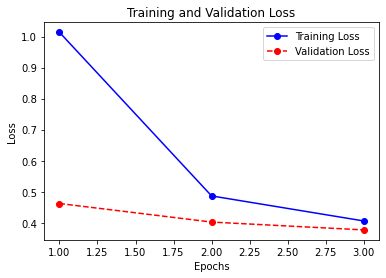

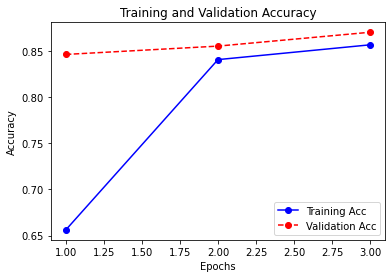

In [50]:
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
X_test, Y_test = randomize(X_test, Y_test)
# 取出10%訓練, 10%測試
X_train = X_train[:5000]
Y_train = Y_train[:5000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]
# One-hot編碼
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
# 載入 ResNet50 模型
resnet_model = ResNet50(weights="imagenet",
                        include_top=False,
                        input_shape=(200, 200, 3))
# 調整X_train的圖片尺寸
print("調整X_train的圖片尺寸...")
X_train_new = np.array(
  [np.asarray(Image.fromarray(X_train[i]).resize(
          (200, 200))) for i in range(0, len(X_train))])
X_train_new = X_train_new.astype("float32")
# 訓練資料的資料前處理 
train_input = preprocess_input(X_train_new)
# 使用 ResNet50 模型預測訓練資料的特徵資料
print("使用 ResNet50 模型預測訓練資料的特徵資料...")
train_features = resnet_model.predict(train_input)
# 調整X_test的圖片尺寸
print("調整X_test的圖片尺寸...")
X_test_new = np.array(
  [np.asarray(Image.fromarray(X_test[i]).resize(
          (200, 200))) for i in range(0, len(X_test))])
X_test_new = X_test_new.astype("float32")
# 測試資料的資料前處理
test_input = preprocess_input(X_test_new)
# 使用 ResNet50 模型預測測試資料的特徵資料
print("使用 ResNet50 模型預測測試資料的特徵資料...")
test_features = resnet_model.predict(test_input)
# 定義模型
model = Sequential()
model.add(GlobalAveragePooling2D(
        input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(train_features, Y_train,
                    validation_data=(test_features, Y_test), 
                    epochs=3, batch_size=32, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(test_features, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:

from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
X_test, Y_test = randomize(X_test, Y_test)
# 取出15%訓練, 20%測試
X_train = X_train[:7500]
Y_train = Y_train[:7500]
X_test = X_test[:2000]
Y_test = Y_test[:2000]
# One-hot編碼
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
# 載入 ResNet50 模型
mobilenet_model = MobileNet(weights="imagenet",
                            include_top=False,
                            input_shape=(224, 224, 3))
# 調整X_train的圖片尺寸
print("調整X_train的圖片尺寸...")
X_train_new = np.array(
  [np.asarray(Image.fromarray(X_train[i]).resize(
          (224, 224))) for i in range(0, len(X_train))])
X_train_new = X_train_new.astype("float32")
# 訓練資料的資料前處理 
train_input = preprocess_input(X_train_new)
# 調整X_test的圖片尺寸
print("調整X_test的圖片尺寸...")
X_test_new = np.array(
  [np.asarray(Image.fromarray(X_test[i]).resize(
          (224, 224))) for i in range(0, len(X_test))])
X_test_new = X_test_new.astype("float32")
# 測試資料的資料前處理
test_input = preprocess_input(X_test_new)
# 定義模型
model = Sequential()
model.add(mobilenet_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 凍結上層模型
mobilenet_model.trainable = False
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(train_input, Y_train, 
                    validation_data=(test_input, Y_test), 
                    epochs=3, batch_size=32, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(test_input, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

調整X_train的圖片尺寸...


MemoryError: Unable to allocate 1.05 GiB for an array with shape (7500, 224, 224, 3) and data type uint8